In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [ ]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    niter = 0
    x = x0

    while True:
      niter += 1
      x_next = x - f(x) / fder(x)
      if np.abs(x - x_next) < eps or niter > maxiter:
        break
      x = x_next
      
    return x_next, niter

In [ ]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

### Your code here.

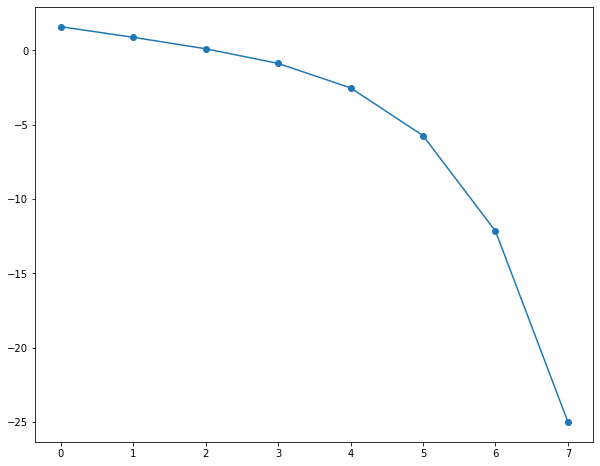

In [ ]:
def f(x):
  return x**2 - 1

def fder(x):
  return 2 * x

x0 = 10
eps = 1e-10
maxiter = 100
error = []


niter = 0
x = x0

while True:
  niter += 1
  x_next = x - f(x) / fder(x)
  error.append(np.abs(x - x_next))
  if np.abs(x - x_next) < eps or niter > maxiter:
    break
  x = x_next


plt.figure(figsize = (10, 8))
plt.plot(np.log(error), 'o-')
plt.show()

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [ ]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    niter = 0
    x = x0
    
    while True:
      niter += 1
      x_next = x - m * f(x) / fder(x)
      if np.abs(x - x_next) < eps or niter > maxiter:
        break
      x = x_next

    return x_next, niter

In [ ]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

### Your code here.

In [ ]:
def f(x):
  return (x ** 2 - 1) ** 2

def fder(x):
  return 4 * (x ** 3 - x)


for x0 in [100, -50]:
  print('x0 =', x0)
  for m in range(1, 7):
    print('m = {}, x = {}, niter = {}'.format(m, *mod_newton(f, fder, 100, m=m)))
  print()

x0 = 100
m = 1, x = 1.0000079692909487, niter = 32
m = 2, x = 1.0, niter = 11
m = 3, x = 0.9999976930062132, niter = 20
m = 4, x = 0.010000000000005116, niter = 101
m = 5, x = -167.0143588602703, niter = 101
m = 6, x = -1.7477801611601524, niter = 101

x0 = -50
m = 1, x = 1.0000079692909487, niter = 32
m = 2, x = 1.0, niter = 11
m = 3, x = 0.9999976930062132, niter = 20
m = 4, x = 0.010000000000005116, niter = 101
m = 5, x = -167.0143588602703, niter = 101
m = 6, x = -1.7477801611601524, niter = 101



# Часть III. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [ ]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Производная `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    niter = 0
    X = X0

    while True:
      niter += 1
      X_next = X - np.linalg.solve(jcb(X), F(X))
      if np.all(np.abs(X - X_next) < eps) or niter > maxiter:
        break
      X = X_next

    return X_next, niter

In [ ]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1, X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                       [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

